<a href="https://colab.research.google.com/github/DarioMameli/DL_Assignments/blob/main/DL_Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DL Assignment 3
## Group 4
**AUTHORS**:
*   Dario Mameli [dario.mameli@ugent.be]
*   Àngel Masip LLopis [angel.masipllopis@ugent.be]
*   Michele Russo [michele.russo@ugent.be]



This notebook is to be intended as both report and code.

Running on google colab is suggested to make sure all required libraries and packages are present.

#GitHub

Let's clone the repo with the dataset

In [ ]:
!git clone https://github.com/dkdk22/DL_Ass3
import sys
# Add the repository to the path
sys.path.insert(1, '/content/DL_Ass3/')

fatal: destination path 'DL_Ass3' already exists and is not an empty directory.


# Setup

Firstly let's setup the workspace

## Pip Installs

In [ ]:
# Install the latest version of TensorFlow, which includes Keras (tf.keras)
#!pip install tensorflow --upgrade
!pip install dask
!pip install keras --upgrade --quiet
!pip install keras-tuner --upgrade
!pip install PrettyTable

## Packages

Let's import all the necessary functions and packages

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import keras
from keras import regularizers
import matplotlib.gridspec as gridspec
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import load_model
import nltk
from nltk.corpus import stopwords
import keras_tuner as kt
from keras import backend as backend
from keras.layers import (
    Input,
    Activation,
    BatchNormalization,
    Conv2D,
    Conv2DTranspose,
    Dense,
    Dropout,
    Flatten,
    GlobalAveragePooling2D,
    MaxPooling2D,
    UpSampling2D
)
from keras.optimizers import SGD, Adam
#from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_curve, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import json
import zipfile
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_score, recall_score
import gdown
import zipfile
import os
from PIL import Image
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras.applications as app
from keras.layers import LSTM, Dense, Embedding, Input, GRU
#from tensorflow.keras.models import Model, load_model
import gc

from prettytable import PrettyTable
#from keras import Model, ops
import zipfile
from skimage.segmentation import mark_boundaries
from sklearn.preprocessing import minmax_scale
#
import warnings
warnings.filterwarnings('ignore')

#Global variables

In [ ]:
SEED =42
TRAIN_BASELINE = True

# Load data

Load the dataset

In [ ]:
zip_file_path = 'DL_Ass3/review_553850.zip'
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall()

with open('review_553850.json', 'r') as json_file:
    data = json.load(json_file)

X = []
y = []

for id, review in data["reviews"].items():
    review_text = review["review"]
    funny_votes = review["votes_funny"]
    X.append(review_text)
    y.append(funny_votes)

In [ ]:
print(X[100])
print(y[100])

For tea!
0


###On closer inspection of the data we see that the target is very unbalanced.

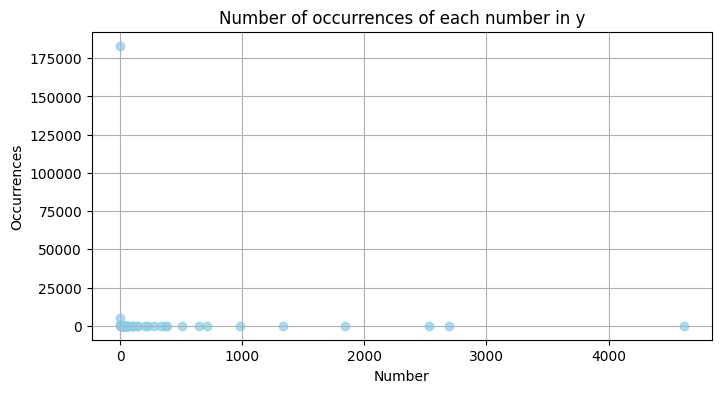

In [ ]:
unique_numbers, counts = np.unique(y, return_counts=True)

plt.figure(figsize=(8, 4))
plt.scatter(unique_numbers, counts, color='skyblue', alpha=0.7)
plt.xlabel('Number')
plt.ylabel('Occurrences')
plt.title('Number of occurrences of each number in y')
plt.grid(True)
plt.show()

We do a log-plot as it is more representative

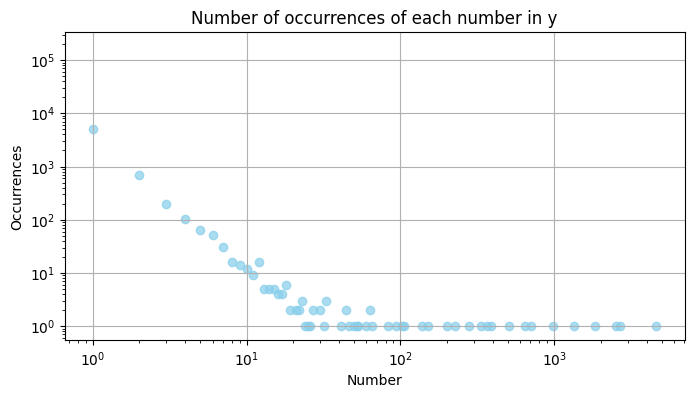

In [ ]:
unique_numbers, counts = np.unique(y, return_counts=True)

plt.figure(figsize=(8, 4))
plt.scatter(unique_numbers, counts, color='skyblue', alpha=0.7)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Number')
plt.ylabel('Occurrences')
plt.title('Number of occurrences of each number in y')
plt.grid(True)
plt.show()

##Data preprocessing

We are going to convert the text into arrays of integers and pad our sequences. As the sequences are very very long we are going to eliminate stopwords to reduce the dimensionality of the data, also we are going to use steeming.

In [ ]:
from nltk.stem import PorterStemmer
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

X_prepro = []
for text in X:
    words = text.split()
    # Remove stopwords and convert to lowercase
    filtered_words = [word.lower() for word in words if word.lower() not in stop_words]
    stemmed_tokens = [stemmer.stem(token) for token in filtered_words]
    # Join the filtered words back into a string
    preprocessed_text = ' '.join(stemmed_tokens)
    X_prepro.append(preprocessed_text)

num_words=10000
tokenizer = Tokenizer(num_words=num_words)
tokenizer.fit_on_texts(X_prepro)
X_sequences = tokenizer.texts_to_sequences(X_prepro)
max_sequence_length = 600
padded_sequences = pad_sequences(X_sequences, maxlen=max_sequence_length)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
X = np.array(padded_sequences)
y = np.array(y)
print(X[1000])
print(padded_sequences[1000])
print(X_sequences[1000])


[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0 

In [ ]:
longest_text = max(X, key=len)

print("length:", len(longest_text))
print("Larger text:")
print(longest_text)


length: 600
Larger text:
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0  

## Testing and validation data split
Split training data into training and validation data, so that a full training-validation-test split is obtained, for maximizing the generalization performance.

In [ ]:
# We are using dask to avoid the RAM to explode
#import dask.array as da
#X = da.from_array(X)
#y = da.from_array(y)
#X=np.array(X)
#y=np.array(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=SEED)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, shuffle=True,  random_state=SEED)

In [ ]:
# To free some RAM to explode
#del X
#del y
#import gc
#gc.collect()

In [ ]:
#X_train = X_train.compute()
#print(X_train)

# Baseline model

This model represents the baseline, and it's defined as the best custom model seen in the labs, and will be used as a reference to see how other models perform.

In [ ]:
def LSTMModel(max_features=20000, embedding_size=128):

    model = Sequential()

    #model.add(Embedding(max_features, embedding_size))
    model.add(LSTM(32, dropout=0.2, recurrent_dropout=0.2, input_shape=(max_sequence_length,1,)))
    model.add(Dense(1, activation="linear"))
    model.compile(loss="mean_squared_error", optimizer="adam", metrics=["mean_absolute_error"])
    return model

In [ ]:
model = LSTMModel()
print(model.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                        │ (None, 32)                  │           4,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,385 (17.13 KB)

 Trainable params: 4,385 (17.13 KB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
batch_size=512
epochs=5

if TRAIN_BASELINE:
  X_train_reshaped = X_train.reshape((X_train.shape[0],max_sequence_length,1))
  history = model.fit(X_train_reshaped, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_val,y_val))
  model.save('/content/DL_Ass3/baseline_model.keras')
else:
  model = load_model('/content/DL_Ass3/baseline_model.keras')
# We reformated X_train to (batch_size, sequence_length, embedding_dim)


Epoch 1/5
237/237 ━━━━━━━━━━━━━━━━━━━━ 143s 602ms/step - loss: 82.7062 - mean_absolute_error: 0.2353 - val_loss: 2.6052 - val_mean_absolute_error: 0.2083
Epoch 2/5
237/237 ━━━━━━━━━━━━━━━━━━━━ 165s 694ms/step - loss: 161.5187 - mean_absolute_error: 0.2854 - val_loss: 2.6044 - val_mean_absolute_error: 0.1143
Epoch 3/5
237/237 ━━━━━━━━━━━━━━━━━━━━ 157s 662ms/step - loss: 61.8799 - mean_absolute_error: 0.2013 - val_loss: 2.6044 - val_mean_absolute_error: 0.1966
Epoch 4/5
237/237 ━━━━━━━━━━━━━━━━━━━━ 191s 614ms/step - loss: 106.4245 - mean_absolute_error: 0.2437 - val_loss: 2.6002 - val_mean_absolute_error: 0.1629
Epoch 5/5
237/237 ━━━━━━━━━━━━━━━━━━━━ 199s 601ms/step - loss: 207.7275 - mean_absolute_error: 0.2978 - val_loss: 2.5986 - val_mean_absolute_error: 0.1549


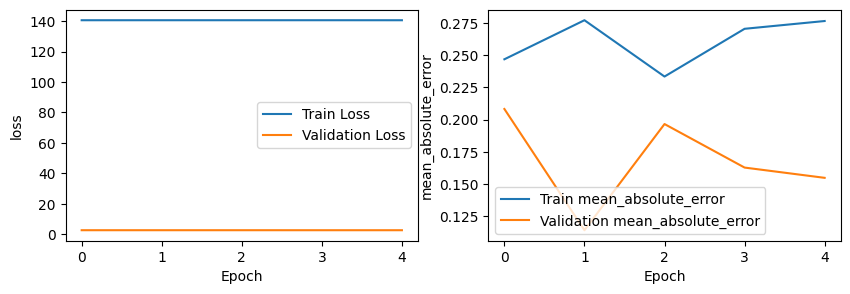

In [ ]:
if TRAIN_BASELINE:
  from dl_utils import plot_history
  plot_history(history)



In [ ]:
loss, mae = model.evaluate(X_test, y_test)
print("Mean Absolute Error:", mae)

# Our model

In [ ]:
class HyperModelBuilder(kt.HyperModel):
    def __init__(self, max_sequence_length, loss_function):
        self.max_sequence_length = max_sequence_length
        self.loss_function = loss_function

    def build_lstm_model(self, hp):
        model = Sequential()
        model.add(LSTM(units=hp.Int('lstm_units', min_value=32, max_value=256, step=32), #https://keras.io/api/layers/recurrent_layers/lstm/
                       dropout=hp.Float('lstm_dropout', min_value=0.0, max_value=0.3, step=0.1),
                       recurrent_dropout=hp.Float('lstm_recurrent_dropout', min_value=0.0, max_value=0.2, step=0.1),
                       input_shape=(self.max_sequence_length, 1)))
        model.add(Dense(1, activation="linear"))

        model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=hp.Choice('learning_rate', values=[1e-3, 1e-4, 1e-5])),
                      loss=self.loss_function,
                      metrics=["mean_absolute_error"])
        return model

    def build_transformer_model(self, hp):
        pass


    def build_gru_model(self, hp):
        model = Sequential()
        model.add(GRU(units=hp.Int('gru_units', min_value=32, max_value=256, step=32),   #https://keras.io/api/layers/recurrent_layers/gru/
                      dropout=hp.Float('lstm_dropout', min_value=0.0, max_value=0.3, step=0.1),
                      recurrent_dropout=hp.Float('lstm_recurrent_dropout', min_value=0.0, max_value=0.2, step=0.1),
                      input_shape=(self.max_sequence_length, 1)))
        model.add(Dense(1, activation="linear"))

        model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=hp.Choice('learning_rate', values=[1e-3, 1e-4, 1e-5])),
                      loss=self.loss_function,
                      metrics=["mean_absolute_error"])
        return model

    def build_model(self,hp):
        model_name = hp.Choice('model_name', values=['LSTM', 'GRU', 'Transformer'])
        if model_name == 'LSTM':
            return self.build_lstm_model(hp)
        elif model_name == 'Transformer':
            return self.build_transformer_model(hp)
        elif model_name == 'GRU':
            return self.build_gru_model(hp)


In [ ]:
# Define hyperparameters for the tuner
hypermodel_builder = HyperModelBuilder(max_sequence_length=max_sequence_length,
                                       loss_function="mean_squared_error")

# Initialize tuner
tuner = kt.RandomSearch(hypermodel_builder.build_model,
                        objective='val_loss',
                        max_trials=10,
                        directory='tuner_results',
                        project_name='regression_tuning')

# Summarize the search space
tuner.search_space_summary()

Search space summary
Default search space size: 5
model_name (Choice)
{'default': 'LSTM', 'conditions': [], 'values': ['LSTM', 'GRU', 'Transformer'], 'ordered': False}
lstm_units (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': 'linear'}
lstm_dropout (Float)
{'default': 0.0, 'conditions': [], 'min_value': 0.0, 'max_value': 0.3, 'step': 0.1, 'sampling': 'linear'}
lstm_recurrent_dropout (Float)
{'default': 0.0, 'conditions': [], 'min_value': 0.0, 'max_value': 0.2, 'step': 0.1, 'sampling': 'linear'}
learning_rate (Choice)
{'default': 0.001, 'conditions': [], 'values': [0.001, 0.0001, 1e-05], 'ordered': True}


# Training


In [ ]:

##### stop_early etc.

# Perform hyperparameter search
tuner.search(X_train, y_train,
             validation_data=(X_val, y_val),
             epochs=10,
             batch_size=64)

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]